# final project - KICKSTARTER

**What is Kickstarter?**

Kickstarter is a funding platform for creative projects. Everything from film, games, and music to art, design, and technology. Kickstarter is full of ambitious, innovative, and imaginative projects that are brought to life through the direct support of others.

Every project creator sets their project's funding goal and deadline. If people like the project, they can pledge money to make it happen. If the project succeeds in reaching its funding goal, all backers' credit cards are charged when time expires. Funding on Kickstarter is all-or-nothing. If the project falls short of its funding goal, no one is charged.

**Objective**

Goal of this analysis it to be able to predict whether or not a project will receive it's goal funds.

## import libraries

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import datetime
import math
import time

# scipy libraries
from scipy import stats
from scipy.stats.mstats import winsorize

# statsmodels libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

# sklearn libraries
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

# balancing libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# language libraries
from textblob import TextBlob
import langid
import yake

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## import data

In [175]:
files = os.listdir('Data')
files

['dataset_my-task-1_2021-10-31_18-52-00-573.xlsx',
 'dataset_my-task-1_2021-10-31_22-32-25-255.xlsx',
 'dataset_my-task-1_2021-11-01_17-24-18-413.xlsx',
 'dataset_my-task-2_2021-10-31_18-52-00-523.xlsx',
 'dataset_my-task-2_2021-10-31_22-37-00-186.xlsx',
 'dataset_my-task-2_2021-11-01_17-24-30-852.xlsx',
 'dataset_my-task-3_2021-10-31_18-52-00-929.xlsx',
 'dataset_my-task-3_2021-10-31_22-32-19-791.xlsx',
 'dataset_my-task-3_2021-11-01_17-24-21-989.xlsx',
 'dataset_my-task-4_2021-10-31_18-51-58-474.xlsx',
 'dataset_my-task-4_2021-10-31_22-32-30-946.xlsx',
 'dataset_my-task-4_2021-11-01_17-24-24-455.xlsx',
 'dataset_my-task_2021-10-31_18-51-58-693.xlsx',
 'dataset_my-task_2021-10-31_22-32-41-350.xlsx',
 'dataset_my-task_2021-11-01_17-24-19-839.xlsx',
 'kickstarter_all_enddate_30102021.xlsx',
 'kickstarter_all_mostbacked.xlsx',
 'kickstarter_all_newest_30102021.xlsx',
 'kickstarter_all_popularity_30102021.xlsx',
 'kickstarter_art_enddate.xlsx',
 'kickstarter_art_newest.xlsx',
 'kickstarte

In [176]:
files = os.listdir('Data')

df = pd.DataFrame()

path = os.getcwd() + "\\Data" + "\\"

for i in files:
    data = pd.read_excel(path + i)
    df = df.append(data)

## first review and clean data

### review

In [177]:
print("This dataset contains {} rows and {} columns".format(*df.shape))

This dataset contains 28428 rows and 47 columns


In [178]:
df.sample(5)

,backers_count,blurb,categoryId,categoryName,categorySlug,converted_pledged_amount,country,country_displayable_name,created_at,created_at_formatted,...,state,state_changed_at,static_usd_rate,title,url,usd_exchange_rate,usd_pledged,usd_type,is_backing,is_starred
555,9,A Happy Halloween Bat Enamel Pin!,21,Digital Art,art/digital art,198,US,the United States,1630034967,"Fri, 27 Aug 2021 03:29:27 +0000",...,successful,1634266914,1.0,Happy Bat - A Halloween Enamel Pin,https://www.kickstarter.com/projects/shadocadi...,1.0,198.00,domestic,NaN,NaN
2175,895,A collection of functional wooden clocks for s...,28,Product Design,design/product design,78014,US,the United States,1604528496,"Wed, 04 Nov 2020 22:21:36 +0000",...,successful,1609365480,1.0,MadClockMaker | 3D Wooden Puzzle. 6 Clock Models.,https://www.kickstarter.com/projects/allfesco/...,1.0,78014.00,international,NaN,NaN
1313,127,"After over a year of being on tour, and at the...",254,Performances,dance/performances,7620,US,the United States,1397850445,"Fri, 18 Apr 2014 19:47:25 +0000",...,successful,1404258900,1.0,"Finally, A Vodca Family DVD!",https://www.kickstarter.com/projects/148450906...,1.0,7620.00,domestic,NaN,NaN
8,6618,Over seventy artists come together to create a...,34,Tabletop Games,games/tabletop games,525677,US,the United States,1632232991,"Tue, 21 Sep 2021 14:03:11 +0000",...,live,1634616029,1.0,Corrupted Tarot By Wyrmwood,https://www.kickstarter.com/projects/wyrmwood/...,1.0,576604.35,NaN,NaN,NaN
1320,11340,Become a villain in this retro-inspired board ...,34,Tabletop Games,games/tabletop games,550868,US,the United States,1589835286,"Mon, 18 May 2020 20:54:46 +0000",...,successful,1594353660,1.0,Overlord: a Boss Monster Adventure,https://www.kickstarter.com/projects/brotherwi...,1.0,550868.69,international,NaN,NaN


### review column names

In [179]:
df.columns

Index(['backers_count', 'blurb', 'categoryId', 'categoryName', 'categorySlug',
       'converted_pledged_amount', 'country', 'country_displayable_name',
       'created_at', 'created_at_formatted', 'creatorAvatar', 'creatorId',
       'creatorName', 'creatorUrl', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline', 'description',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_starrable',
       'launched_at', 'launched_at_formatted', 'link', 'locationId',
       'locationName', 'name', 'photo', 'pledged', 'pubDate', 'slug',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'title', 'url', 'usd_exchange_rate', 'usd_pledged',
       'usd_type', 'is_backing', 'is_starred'],
      dtype='object')

no cleaning of column names required

### Drop Duplicates

In [180]:
before_dropping_duplicates = df.shape

In [181]:
df = df.drop_duplicates()

In [182]:
after_dropping_duplicates = df.shape

In [183]:
# duplicate rows that have been dropped ... 

before_dropping_duplicates[0] - after_dropping_duplicates[0]

2341

### drop duplicate projects with different values

#### check for duplicate projects

In [184]:
df.duplicated(subset='id', keep='first').sum()

8275

#### review duplicates

In [185]:
df[df.duplicated(subset=['id'],keep=False)].sort_values(by=['id'])

,backers_count,blurb,categoryId,categoryName,categorySlug,converted_pledged_amount,country,country_displayable_name,created_at,created_at_formatted,...,state,state_changed_at,static_usd_rate,title,url,usd_exchange_rate,usd_pledged,usd_type,is_backing,is_starred
1976,7798,Reuse and recycle plastic bottles of all kinds...,28,Product Design,design/product design,400276,FR,France,1454599119,"Thu, 04 Feb 2016 15:18:39 +0000",...,successful,1461409167,1.111204,Plastic Bottle Cutter,https://www.kickstarter.com/projects/910418035...,1.12246,396262.032441,international,NaN,NaN
1976,7798,Reuse and recycle plastic bottles of all kinds...,28,Product Design,design/product design,400276,FR,France,1454599119,"Thu, 04 Feb 2016 15:18:39 +0000",...,successful,1461409167,1.111204,Plastic Bottle Cutter,https://www.kickstarter.com/projects/910418035...,1.12246,396262.032441,domestic,NaN,NaN
213,78,A fun hackable handheld gaming console & learn...,52,Hardware,technology/hardware,8054,GB,the United Kingdom,1634240494,"Thu, 14 Oct 2021 19:41:34 +0000",...,live,1635346827,1.376580,8BitCADE Level UP - Fun Hackable Game Console ...,https://www.kickstarter.com/projects/jackdaly/...,1.37947,8038.070698,domestic,NaN,NaN
208,78,A fun hackable handheld gaming console & learn...,52,Hardware,technology/hardware,8054,GB,the United Kingdom,1634240494,"Thu, 14 Oct 2021 19:41:34 +0000",...,live,1635346827,1.376580,8BitCADE Level UP - Fun Hackable Game Console ...,https://www.kickstarter.com/projects/jackdaly/...,1.37947,8038.070698,domestic,NaN,NaN
1818,109,A 78 card tarot deck with a little bit of ever...,22,Illustration,art/illustration,13082,US,the United States,1612369415,"Wed, 03 Feb 2021 16:23:35 +0000",...,successful,1618113600,1.000000,The Fools Tarot,https://www.kickstarter.com/projects/nyahouse/...,1.00000,13082.000000,international,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,114,A collection of Lewd Art and Comics about Mons...,22,Illustration,art/illustration,2340,GB,the United Kingdom,1630222933,"Sun, 29 Aug 2021 07:42:13 +0000",...,live,1630571977,1.373808,Monster Layer,https://www.kickstarter.com/projects/marcodrag...,1.36850,2349.210893,domestic,NaN,NaN
50,98,A collection of Lewd Art and Comics about Mons...,22,Illustration,art/illustration,2027,GB,the United Kingdom,1630222933,"Sun, 29 Aug 2021 07:42:13 +0000",...,live,1630571977,1.373808,Monster Layer,https://www.kickstarter.com/projects/marcodrag...,1.37947,2019.497084,international,NaN,NaN
166,113,A collection of Lewd Art and Comics about Mons...,22,Illustration,art/illustration,2292,GB,the United Kingdom,1630222933,"Sun, 29 Aug 2021 07:42:13 +0000",...,live,1630571977,1.373808,Monster Layer,https://www.kickstarter.com/projects/marcodrag...,1.36850,2301.127630,domestic,NaN,NaN
1102,38,"An indie pilot about two best friends,Mugshot ...",290,Video Art,art/video art,1537,US,the United States,1622493756,"Mon, 31 May 2021 20:42:36 +0000",...,successful,1628103600,1.000000,Mugshot&Pollen (Animated Pilot),https://www.kickstarter.com/projects/mnpcartoo...,1.00000,1537.000000,domestic,NaN,NaN


#### drop double listing of projects

In [186]:
df = (df.sort_values(by=['id', 'converted_pledged_amount'], ascending=False).drop_duplicates(subset='id', keep= 'first').reset_index(drop=True))

#### set id as index and review shape after drop

In [187]:
df = df.set_index('id')

In [188]:
df.shape

(17812, 46)

### drop columns

In [189]:
to_drop = ['blurb', 
           'categoryId', 
           'country_displayable_name', 
           'creatorAvatar', 
           'creatorId', 
           'creatorName', 
           'creatorUrl', 
           'currency_symbol', 
           'link', 
           'locationId', 
           'slug', 
           'title', 
           'url']

In [190]:
df = df.drop(to_drop, axis=1)

In [191]:
df.shape

(17812, 33)

In [192]:
df.columns

Index(['backers_count', 'categoryName', 'categorySlug',
       'converted_pledged_amount', 'country', 'created_at',
       'created_at_formatted', 'currency', 'currency_trailing_code',
       'current_currency', 'deadline', 'description', 'disable_communication',
       'fx_rate', 'goal', 'is_starrable', 'launched_at',
       'launched_at_formatted', 'locationName', 'name', 'photo', 'pledged',
       'pubDate', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_exchange_rate', 'usd_pledged', 'usd_type',
       'is_backing', 'is_starred'],
      dtype='object')

### review dtypes

In [224]:
### Review DTypes

df.dtypes

# boolean columns death_event, smoking, sex, high_blood_pressure, diabetes, anaemia
# df = df.astype({'death_event':'boolean', 'sex':'boolean', 'smoking':'boolean', 'high_blood_pressure':'boolean','diabetes':'boolean','anaemia':'boolean','age':'int64'})


df = df.astype({'polarity':'int64', 'subjectivity':'int64'})

df.dtypes

backers_count                 int64
categoryName                 object
categorySlug                 object
converted_pledged_amount      int64
country                      object
created_at                    int64
created_at_formatted         object
currency                     object
currency_trailing_code         bool
current_currency             object
deadline                      int64
description                  object
disable_communication          bool
fx_rate                     float64
goal                        float64
is_starrable                   bool
launched_at                   int64
launched_at_formatted        object
locationName                 object
name                         object
photo                       float64
pledged                     float64
pubDate                      object
spotlight                      bool
staff_pick                     bool
state                        object
state_changed_at              int64
static_usd_rate             

to review

### Null Values

In [194]:
df.isna().any()

backers_count               False
categoryName                False
categorySlug                False
converted_pledged_amount    False
country                     False
created_at                  False
created_at_formatted        False
currency                    False
currency_trailing_code      False
current_currency            False
deadline                    False
description                  True
disable_communication       False
fx_rate                     False
goal                        False
is_starrable                False
launched_at                 False
launched_at_formatted       False
locationName                False
name                        False
photo                        True
pledged                     False
pubDate                     False
spotlight                   False
staff_pick                  False
state                       False
state_changed_at            False
static_usd_rate             False
usd_exchange_rate           False
usd_pledged   

No null values present in this dataset

### Data Values

In [195]:
for col in data:
    print(data[col].value_counts(), '\n')

3199     1
7713     1
44949    1
81567    1
83193    1
78471    1
88887    1
27168    1
68929    1
62642    1
66673    1
19264    1
Name: backers_count, dtype: int64 

A cooperative nightmare horror game experience. Hunt intelligent monsters and develop your settlement through a self-running campaign.     1
An officially licensed tabletop roleplaying game set in the world of Avatar: The Last Airbender and The Legend of Korra                    1
A full-featured tripod in a truly portable form.                                                                                           1
Euro-inspired dungeon crawling sequel to the 2017 smash-hit Gloomhaven                                                                     1
Color e-paper smartwatch with up to 7 days of battery and a new timeline interface that highlights what's important in your day.           1
Expandable capacity (3.6-25kWh) | Power almost anything (3.6-7.2kW) | Home battery ecosystem                                   

### convert timestamps

#### created_at

In [196]:
date = []
time = []
weekday = []

for i in df['created_at']:
    date.append(datetime.datetime.fromtimestamp(int(i)).strftime('%Y-%m-%d'))
    time.append(datetime.datetime.fromtimestamp(int(i)).strftime('%H:%M:%S'))
    weekday.append(datetime.datetime.fromtimestamp(int(i)).strftime('%A'))

df['created_date'] = date
df['created_time'] = time
df['created_weekday'] = weekday

#### launched_at

In [197]:
date = []
time = []
weekday = []

for i in df['launched_at']:
    date.append(datetime.datetime.fromtimestamp(int(i)).strftime('%Y-%m-%d'))
    time.append(datetime.datetime.fromtimestamp(int(i)).strftime('%H:%M:%S'))
    weekday.append(datetime.datetime.fromtimestamp(int(i)).strftime('%A'))

df['launched_date'] = date
df['launched_time'] = time
df['launched_weekday'] = weekday

#### deadline

In [198]:
date = []
time = []
weekday = []

for i in df['deadline']:
    date.append(datetime.datetime.fromtimestamp(int(i)).strftime('%Y-%m-%d'))
    time.append(datetime.datetime.fromtimestamp(int(i)).strftime('%H:%M:%S'))
    weekday.append(datetime.datetime.fromtimestamp(int(i)).strftime('%A'))

df['deadline_date'] = date
df['deadline_time'] = time
df['deadline_weekday'] = weekday

#### add project duration column

In [199]:
# time between deadline and launched

project_duration = []

for i,j in zip(df.deadline, df.launched_at):
    a = ((i - j) / 60 / 60 / 24)
    project_duration.append(a)
    
df['project_duration'] = project_duration

### add target column

In [200]:
conditions = [
    ((df['goal'] - df['converted_pledged_amount']) >= 0),
    ((df['goal'] - df['converted_pledged_amount']) < 0)
]

values = ['yes', 'no']

df['goal_reached'] = np.select(conditions, values)

In [201]:
df['goal_reached'].value_counts()

no     15293
yes     2519
Name: goal_reached, dtype: int64

In [202]:
df['state'].value_counts()

successful    15424
live           2388
Name: state, dtype: int64

In [203]:
data_crosstab = pd.crosstab(df['state'], df['goal_reached'], margins = False)
data_crosstab

goal_reached,no,yes
state,,
live,978,1410
successful,14315,1109


## get information from language

### add language column

In [218]:
language = []

for i in df['description']:
    if isinstance(i, float):
        language.append(0)
    else:
        a = langid.classify(i)
        language.append(a[0])        
    
df['language'] = language

In [219]:
df.shape

(17812, 47)

In [220]:
df['language'].value_counts()

en    16975
es      209
fr      186
de       82
it       59
da       38
sv       28
nl       26
id       22
ja       19
no       15
zh       13
fi       12
ca       12
pl       12
la       10
ro        9
sl        8
mt        6
et        6
eo        4
ms        4
nn        4
lb        3
af        3
cs        3
mg        3
ga        3
lt        3
ku        3
hu        3
pt        3
rw        2
tr        2
jv        2
gl        2
br        2
he        2
cy        2
nb        2
tl        2
sk        1
sw        1
am        1
ht        1
lo        1
ru        1
xh        1
0         1
Name: language, dtype: int64

### add polarity and subjectivity column

In [221]:
polarity = []
subjectivity = []

for i in df['description']:
    if isinstance(i, float):
        polarity.append(0)
        subjectivity.append(0)
    else:
        a = TextBlob(i)
        polarity.append(round(a.polarity,2))
        subjectivity.append(round(a.subjectivity,2))

df['polarity'] = polarity
df['subjectivity'] = subjectivity

In [222]:
df.shape

(17812, 47)

In [223]:
df

,backers_count,categoryName,categorySlug,converted_pledged_amount,country,created_at,created_at_formatted,currency,currency_trailing_code,current_currency,...,launched_time,launched_weekday,deadline_date,deadline_time,deadline_weekday,project_duration,goal_reached,language,polarity,subjectivity
id,,,,,,,,,,,,,,,,,,,,,
2147420152,30,Ready-to-wear,fashion/ready-to-wear,10457,US,1628823745,"Fri, 13 Aug 2021 03:02:25 +0000",USD,True,USD,...,22:02:16,Wednesday,2021-09-17,22:02:16,Friday,30.000000,no,en,0.62,0.90
2147364781,113,Dance,dance,14360,US,1404495054,"Fri, 04 Jul 2014 17:30:54 +0000",USD,True,USD,...,23:41:00,Monday,2014-08-08,07:01:00,Friday,31.305556,no,en,0.00,0.00
2147339483,56,Spaces,dance/spaces,4793,GB,1459856095,"Tue, 05 Apr 2016 11:34:55 +0000",GBP,False,USD,...,14:23:32,Tuesday,2016-05-12,14:23:32,Thursday,30.000000,no,en,0.00,0.00
2147336747,13,Dance,dance,601,US,1328195174,"Thu, 02 Feb 2012 15:06:14 +0000",USD,True,USD,...,18:56:31,Tuesday,2012-03-30,15:57:00,Friday,37.833669,no,en,0.24,0.63
2147319993,38,Video Art,art/video art,1537,US,1622493756,"Mon, 31 May 2021 20:42:36 +0000",USD,True,USD,...,01:37:40,Sunday,2021-08-04,21:00:00,Wednesday,59.807176,no,en,0.23,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771637,2391,Product Design,design/product design,358286,US,1487503901,"Sun, 19 Feb 2017 11:31:41 +0000",USD,True,USD,...,14:02:41,Monday,2017-05-27,04:59:00,Saturday,32.622442,no,en,0.37,0.52
442565,26,Printing,crafts/printing,1125,US,1491541674,"Fri, 07 Apr 2017 05:07:54 +0000",USD,True,USD,...,00:48:21,Thursday,2017-05-03,00:48:21,Wednesday,20.000000,no,en,0.05,0.63
368761,11,Product Design,design/product design,1789,GB,1615582150,"Fri, 12 Mar 2021 20:49:10 +0000",GBP,False,USD,...,23:29:53,Wednesday,2021-04-24,00:29:53,Saturday,30.000000,no,en,0.20,0.30


### add length for columns name and description

In [210]:
length_name = []
length_description = []

for i,j in zip(df.name, df.description):
    length_name.append(len(i))
    length_description.append(len(j))
    
df['length_name'] = length_name
df['length_description'] = length_description

TypeError: object of type 'float' has no len()

In [211]:
df.shape

(17812, 47)

### keyword extractions with yake

In [ ]:
for i in 

In [82]:
kw_extractor = yake.KeywordExtractor()

In [83]:
text = 'How to check if a number is an int or float in Python'

In [84]:
language = 'en'

In [85]:
max_ngram_size = 1

In [86]:
deduplication_threshold = 0.9

In [95]:
numOfKeywords = 3

In [96]:
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)

In [97]:
keywords = custom_kw_extractor.extract_keywords(text)

In [98]:
for kw in keywords:
    print(kw)

('Python', 0.08596317751626563)
('check', 0.29736558256021506)
('number', 0.29736558256021506)


## Explore Cleaned Data

### projects per weekday

In [231]:
df.groupby(["goal_reached"])["goal"].mean().sort_values(ascending=False)

goal_reached
yes    154115.685987
no      18967.603290
Name: goal, dtype: float64

In [213]:
df.columns

Index(['backers_count', 'categoryName', 'categorySlug',
       'converted_pledged_amount', 'country', 'created_at',
       'created_at_formatted', 'currency', 'currency_trailing_code',
       'current_currency', 'deadline', 'description', 'disable_communication',
       'fx_rate', 'goal', 'is_starrable', 'launched_at',
       'launched_at_formatted', 'locationName', 'name', 'photo', 'pledged',
       'pubDate', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_exchange_rate', 'usd_pledged', 'usd_type',
       'is_backing', 'is_starred', 'created_date', 'created_time',
       'created_weekday', 'launched_date', 'launched_time', 'launched_weekday',
       'deadline_date', 'deadline_time', 'deadline_weekday',
       'project_duration', 'goal_reached', 'language', 'polarity',
       'subjectivity'],
      dtype='object')

### projects per category

### Check for Correlation

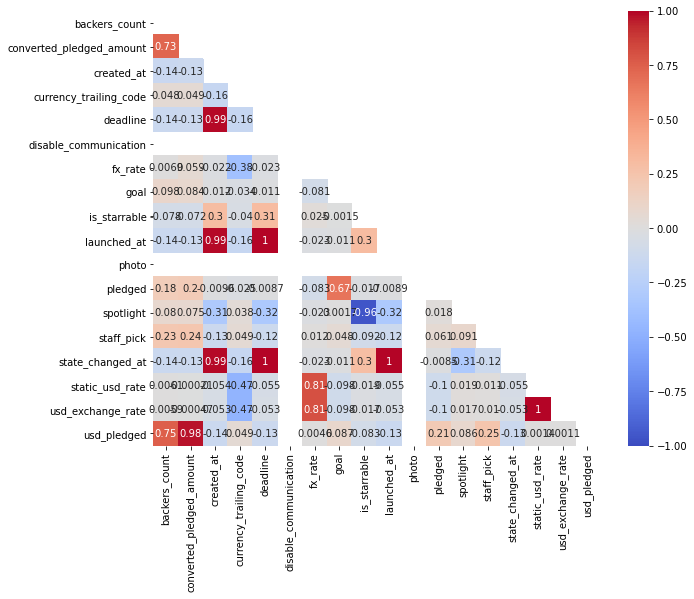

In [99]:
#round(df.corr()['death_event'].sort_values(ascending=False),2)

# create correlation heatmap 

mask = np.zeros_like(df.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

plt.show()

## data imbalances

### check whether data is imbalanced

no     15250
yes     2370
Name: goal_reached, dtype: int64

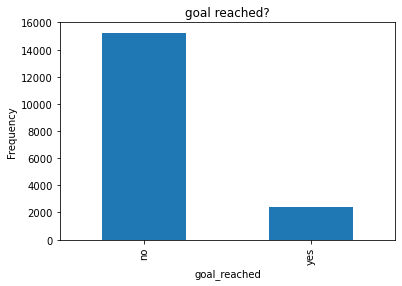

In [34]:
pd.value_counts(df['goal_reached']).plot.bar()
plt.title('goal reached?')
plt.xlabel('goal_reached')
plt.ylabel('Frequency')
df['goal_reached'].value_counts()

**YES** our data is imbalanced, as we have 13.324 'no' values and 2.313 'yes' values

### deal with imbalances